# web scraping

In [22]:
import ast
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import requests
import pandas as pd
import time

def fetch_earthquake_data(start_date, end_date, min_magnitude):
    url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
    params = {
        "format": "geojson",
        "starttime": start_date,
        "endtime": end_date,
        "minmagnitude": min_magnitude,
        "minlatitude": -11.00,  # Minimum latitude for Indonesia
        "maxlatitude": 6.00,    # Maximum latitude for Indonesia
        "minlongitude": 95.00,  # Minimum longitude for Indonesia
        "maxlongitude": 141.00  # Maximum longitude for Indonesia
    }
    retries = 3
    for i in range(retries):
        try:
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                events = data['features']
                if len(events) > 0:
                    # Normalize JSON data into a flat table
                    normalized_data = pd.json_normalize(events)
                    # Extract 'time' from 'properties' dictionary and convert to datetime
                    normalized_data['time'] = pd.to_datetime(normalized_data['properties.time'], unit='ms')
                    # Create a new column 'date' with the date part of the 'time' column
                    normalized_data['date'] = normalized_data['time'].dt.date
                    return normalized_data
                else:
                    print("Tidak ada data gempa bumi untuk periode ini.")
                    return pd.DataFrame()
            else:
                print(f"Terjadi kesalahan: {response.status_code}")
                print(response.text)
                return pd.DataFrame()
        except requests.exceptions.RequestException as e:
            print(f"Percobaan {i+1} gagal: {e}")
            time.sleep(5)  # Wait for 5 seconds before retrying
    print("Gagal mengambil data setelah beberapa percobaan.")
    return pd.DataFrame()

# Mengambil data dengan magnitudo > 5 dari Januari 2019 hingga Desember 2024 untuk Indonesia
all_data = pd.DataFrame()
for year in range(2014, 2025):
    for month in range(1, 13):
        start_date = f"{year}-{month:02d}-01"
        if month == 12:
            end_date = f"{year}-12-31"
        else:
            end_date = f"{year}-{month+1:02d}-01"
        print(f"Mengambil data dari {start_date} hingga {end_date}")
        monthly_data = fetch_earthquake_data(start_date, end_date, 5)
        all_data = pd.concat([all_data, monthly_data], ignore_index=True)

# Menyimpan data ke file CSV
if not all_data.empty:
    all_data.to_csv('earthquake_data_2019_to_2024_magnitude_above_5_indonesia_with_dates.csv', index=False)
    print("Data berhasil disimpan ke 'earthquake_data_2019_to_2024_magnitude_above_5_indonesia_with_dates.csv'")
else:
    print("Tidak ada data yang disimpan karena tidak ada data gempa bumi yang ditemukan.")

Mengambil data dari 2014-01-01 hingga 2014-02-01
Mengambil data dari 2014-02-01 hingga 2014-03-01


/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_2707/3045054898.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, monthly_data], ignore_index=True)


Mengambil data dari 2014-03-01 hingga 2014-04-01
Mengambil data dari 2014-04-01 hingga 2014-05-01


/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_2707/3045054898.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, monthly_data], ignore_index=True)


Mengambil data dari 2014-05-01 hingga 2014-06-01
Mengambil data dari 2014-06-01 hingga 2014-07-01


/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_2707/3045054898.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, monthly_data], ignore_index=True)


Mengambil data dari 2014-07-01 hingga 2014-08-01
Mengambil data dari 2014-08-01 hingga 2014-09-01
Mengambil data dari 2014-09-01 hingga 2014-10-01


/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_2707/3045054898.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, monthly_data], ignore_index=True)


Mengambil data dari 2014-10-01 hingga 2014-11-01
Mengambil data dari 2014-11-01 hingga 2014-12-01
Mengambil data dari 2014-12-01 hingga 2014-12-31
Mengambil data dari 2015-01-01 hingga 2015-02-01
Mengambil data dari 2015-02-01 hingga 2015-03-01
Mengambil data dari 2015-03-01 hingga 2015-04-01
Mengambil data dari 2015-04-01 hingga 2015-05-01
Mengambil data dari 2015-05-01 hingga 2015-06-01
Mengambil data dari 2015-06-01 hingga 2015-07-01
Mengambil data dari 2015-07-01 hingga 2015-08-01
Mengambil data dari 2015-08-01 hingga 2015-09-01
Mengambil data dari 2015-09-01 hingga 2015-10-01
Mengambil data dari 2015-10-01 hingga 2015-11-01
Mengambil data dari 2015-11-01 hingga 2015-12-01
Mengambil data dari 2015-12-01 hingga 2015-12-31
Mengambil data dari 2016-01-01 hingga 2016-02-01
Mengambil data dari 2016-02-01 hingga 2016-03-01
Mengambil data dari 2016-03-01 hingga 2016-04-01
Mengambil data dari 2016-04-01 hingga 2016-05-01
Mengambil data dari 2016-05-01 hingga 2016-06-01
Mengambil data dari 

/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_2707/3045054898.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, monthly_data], ignore_index=True)


Mengambil data dari 2022-05-01 hingga 2022-06-01
Mengambil data dari 2022-06-01 hingga 2022-07-01
Mengambil data dari 2022-07-01 hingga 2022-08-01
Mengambil data dari 2022-08-01 hingga 2022-09-01
Mengambil data dari 2022-09-01 hingga 2022-10-01
Mengambil data dari 2022-10-01 hingga 2022-11-01


/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_2707/3045054898.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, monthly_data], ignore_index=True)


Mengambil data dari 2022-11-01 hingga 2022-12-01
Mengambil data dari 2022-12-01 hingga 2022-12-31
Mengambil data dari 2023-01-01 hingga 2023-02-01
Mengambil data dari 2023-02-01 hingga 2023-03-01
Mengambil data dari 2023-03-01 hingga 2023-04-01
Mengambil data dari 2023-04-01 hingga 2023-05-01
Mengambil data dari 2023-05-01 hingga 2023-06-01
Mengambil data dari 2023-06-01 hingga 2023-07-01
Mengambil data dari 2023-07-01 hingga 2023-08-01
Mengambil data dari 2023-08-01 hingga 2023-09-01
Mengambil data dari 2023-09-01 hingga 2023-10-01
Mengambil data dari 2023-10-01 hingga 2023-11-01
Mengambil data dari 2023-11-01 hingga 2023-12-01
Mengambil data dari 2023-12-01 hingga 2023-12-31
Mengambil data dari 2024-01-01 hingga 2024-02-01
Mengambil data dari 2024-02-01 hingga 2024-03-01
Mengambil data dari 2024-03-01 hingga 2024-04-01
Mengambil data dari 2024-04-01 hingga 2024-05-01
Mengambil data dari 2024-05-01 hingga 2024-06-01
Mengambil data dari 2024-06-01 hingga 2024-07-01
Mengambil data dari 

In [23]:
earthquake = pd.read_csv('earthquake_data_2014_to_2024_magnitude_above_5_indonesia.csv')

In [24]:
earthquake.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates,time,date
0,Feature,usb000m8w7,5.0,"45 km S of Kroya, Indonesia",1390839240800,1658815659078,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,8.0,...,1.225,0.68,23,mb,earthquake,"M 5.0 - 45 km S of Kroya, Indonesia",Point,"[109.2927, -8.0452, 87.85]",2014-01-27 16:14:00.800,2014-01-27
1,Feature,usb000m8hj,5.0,"174 km NE of Tual, Indonesia",1390766098660,1395944143000,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,2.522,1.38,46,mb,earthquake,"M 5.0 - 174 km NE of Tual, Indonesia",Point,"[134.0333, -4.7178, 12.77]",2014-01-26 19:54:58.660,2014-01-26
2,Feature,usc000mkb3,5.2,"41 km S of Kroya, Indonesia",1390627516000,1395944139000,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,1.214,0.50,44,mb,earthquake,"M 5.2 - 41 km S of Kroya, Indonesia",Point,"[109.3003, -8.0009, 84.51]",2014-01-25 05:25:16.000,2014-01-25
3,Feature,usb000m7wd,6.1,"39 km S of Kroya, Indonesia",1390626858510,1678921696799,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,28.0,...,1.248,1.45,20,mww,earthquake,"M 6.1 - 39 km S of Kroya, Indonesia",Point,"[109.2653, -7.9855, 66]",2014-01-25 05:14:18.510,2014-01-25
4,Feature,usb000m7by,5.3,"263 km WSW of Tual, Indonesia",1390573884670,1395944138000,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,1.517,1.01,21,mb,earthquake,"M 5.3 - 263 km WSW of Tual, Indonesia",Point,"[130.5877, -6.63, 60.27]",2014-01-24 14:31:24.670,2014-01-24


In [25]:
# Function to check which Indonesian timezone the given time corresponds to
def check_indonesia_timezone(time_in_milliseconds, given_time):
    # Convert to seconds
    time_in_seconds = time_in_milliseconds / 1000.0

    # Convert to a datetime object in UTC
    event_time_utc = datetime.utcfromtimestamp(time_in_seconds)

    # Define Indonesian timezone offsets
    wib_offset = timedelta(hours=7)
    wita_offset = timedelta(hours=8)
    wit_offset = timedelta(hours=9)

    # Calculate time in each Indonesian timezone
    event_time_wib = event_time_utc + wib_offset
    event_time_wita = event_time_utc + wita_offset
    event_time_wit = event_time_utc + wit_offset

    # Calculate the difference in hours between event_time_utc and given_time
    diff_wib = abs((event_time_wib - given_time).total_seconds() / 3600)
    diff_wita = abs((event_time_wita - given_time).total_seconds() / 3600)
    diff_wit = abs((event_time_wit - given_time).total_seconds() / 3600)

    # Check which timezone has the smallest difference
    min_diff = min(diff_wib, diff_wita, diff_wit)
    if min_diff == diff_wib:
        return "WIB (Western Indonesia Time, UTC+7)"
    elif min_diff == diff_wita:
        return "WITA (Central Indonesia Time, UTC+8)"
    elif min_diff == diff_wit:
        return "WIT (Eastern Indonesia Time, UTC+9)"
    else:
        return "Unknown Timezone"

# Example DataFrame
data = {
    'properties.time': [1548779091930],  # Example timestamp
    'time': [datetime(2019, 1, 29, 16, 24, 51, 930000)]  # Corresponding datetime in WIB
}

# Convert 'properties.time' from milliseconds to a datetime object in 'time' column if not already done
earthquake['time'] = pd.to_datetime(earthquake['time'])

# Apply the timezone check function to each row
earthquake['timezone'] = earthquake.apply(lambda row: check_indonesia_timezone(row['properties.time'], row['time']), axis=1)

In [26]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   type                  2129 non-null   object        
 1   id                    2129 non-null   object        
 2   properties.mag        2129 non-null   float64       
 3   properties.place      2129 non-null   object        
 4   properties.time       2129 non-null   int64         
 5   properties.updated    2129 non-null   int64         
 6   properties.tz         0 non-null      float64       
 7   properties.url        2129 non-null   object        
 8   properties.detail     2129 non-null   object        
 9   properties.felt       911 non-null    float64       
 10  properties.cdi        911 non-null    float64       
 11  properties.mmi        654 non-null    float64       
 12  properties.alert      645 non-null    object        
 13  properties.status 

# drop columns

In [27]:
earthquake['timezone'].value_counts()

timezone
WIB (Western Indonesia Time, UTC+7)    2129
Name: count, dtype: int64

In [28]:
earthquake['properties.url'].value_counts

<bound method IndexOpsMixin.value_counts of 0       https://earthquake.usgs.gov/earthquakes/eventp...
1       https://earthquake.usgs.gov/earthquakes/eventp...
2       https://earthquake.usgs.gov/earthquakes/eventp...
3       https://earthquake.usgs.gov/earthquakes/eventp...
4       https://earthquake.usgs.gov/earthquakes/eventp...
                              ...                        
2124    https://earthquake.usgs.gov/earthquakes/eventp...
2125    https://earthquake.usgs.gov/earthquakes/eventp...
2126    https://earthquake.usgs.gov/earthquakes/eventp...
2127    https://earthquake.usgs.gov/earthquakes/eventp...
2128    https://earthquake.usgs.gov/earthquakes/eventp...
Name: properties.url, Length: 2129, dtype: object>

In [29]:
earthquake.isna().sum()

type                       0
id                         0
properties.mag             0
properties.place           0
properties.time            0
properties.updated         0
properties.tz           2129
properties.url             0
properties.detail          0
properties.felt         1218
properties.cdi          1218
properties.mmi          1475
properties.alert        1484
properties.status          0
properties.tsunami         0
properties.sig             0
properties.net             0
properties.code            0
properties.ids             0
properties.sources         0
properties.types           0
properties.nst          1705
properties.dmin            0
properties.rms             0
properties.gap             0
properties.magType         0
properties.type            0
properties.title           0
geometry.type              0
geometry.coordinates       0
time                       0
date                       0
timezone                   0
dtype: int64

In [30]:
earthquake['properties.magType'].value_counts()

properties.magType
mb     1071
mww    1010
mwb      38
mwc      10
Name: count, dtype: int64

In [31]:
earthquake['properties.type'].value_counts()

properties.type
earthquake    2129
Name: count, dtype: int64

In [32]:
earthquake['geometry.type'].value_counts()

geometry.type
Point    2129
Name: count, dtype: int64

In [33]:
earthquake['properties.status'].value_counts()

properties.status
reviewed    2129
Name: count, dtype: int64

In [34]:
earthquake['properties.net'].value_counts()

properties.net
us    2129
Name: count, dtype: int64

In [35]:
earthquake['properties.code'].value_counts()

properties.code
b000m8w7    1
6000c90z    1
7000cdyv    1
7000cekv    1
7000cfxq    1
           ..
2000bkys    1
1000az4z    1
1000az80    1
2000ae1c    1
7000mpge    1
Name: count, Length: 2129, dtype: int64

In [36]:
earthquake['properties.ids'].value_counts()

properties.ids
,usb000m8w7,               1
,us6000c90z,               1
,us7000cdyv,               1
,us7000cekv,               1
,us7000cfxq,pt20322000,    1
                          ..
,us2000bkys,               1
,us1000az4z,               1
,us1000az80,               1
,us2000ae1c,               1
,us7000mpge,               1
Name: count, Length: 2129, dtype: int64

In [37]:
earthquake['properties.sources'].value_counts()

properties.sources
,us,                               1360
,us,iscgem,                         276
,us,gcmt,iscgem,                     86
,us,usauto,                          66
,usauto,us,                          60
,us,gcmt,                            37
,us,usauto,pt,                       30
,us,usauto,pt,at,                    29
,iscgem,us,                          28
,us,usauto,at,pt,                    26
,us,pt,                              19
,usauto,pt,us,                       17
,us,gcmt,iscgem,atlas,               15
,pt,us,                              11
,us,pt,at,                           10
,us,at,pt,                            7
,us,usauto,at,                        5
,us,iscgem,atlas,                     4
,pt,at,us,                            4
,at,pt,us,usauto,                     3
,at,pt,us,                            3
,at,us,pt,usauto,                     2
,at,us,                               2
,usauto,pt,at,us,                     2
,pt,at,us,gcmt,iscgem

In [38]:
earthquake['properties.alert'].value_counts()

properties.alert
green     635
yellow      7
orange      2
red         1
Name: count, dtype: int64

In [39]:
earthquake['properties.types'].value_counts()

properties.types
,origin,phase-data,                                                                                                                                      578
,dyfi,origin,phase-data,                                                                                                                                 173
,moment-tensor,origin,phase-data,                                                                                                                        162
,cap,origin,phase-data,                                                                                                                                  142
,cap,dyfi,origin,phase-data,                                                                                                                             114
                                                                                                                                                        ... 
,internal-origin,moment-tensor,origin,pha

In [40]:
columns_to_drop = [
    'properties.tz',
    'properties.time',
    'properties.url',
    'properties.detail',
    'properties.type',
    'geometry.type',
    'properties.net',
    'properties.code',
    'properties.ids',
    'properties.sources',
    'properties.types',
    'properties.status',
    'type',
    'date',
    'properties.title'
]

earthquake.drop(columns=columns_to_drop, inplace=True)

In [41]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2129 non-null   object        
 1   properties.mag        2129 non-null   float64       
 2   properties.place      2129 non-null   object        
 3   properties.updated    2129 non-null   int64         
 4   properties.felt       911 non-null    float64       
 5   properties.cdi        911 non-null    float64       
 6   properties.mmi        654 non-null    float64       
 7   properties.alert      645 non-null    object        
 8   properties.tsunami    2129 non-null   int64         
 9   properties.sig        2129 non-null   int64         
 10  properties.nst        424 non-null    float64       
 11  properties.dmin       2129 non-null   float64       
 12  properties.rms        2129 non-null   float64       
 13  properties.gap    

In [42]:
earthquake.head()

,id,properties.mag,properties.place,properties.updated,properties.felt,properties.cdi,properties.mmi,properties.alert,properties.tsunami,properties.sig,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,geometry.coordinates,time,timezone
0,usb000m8w7,5.0,"45 km S of Kroya, Indonesia",1658815659078,8.0,5.3,NaN,NaN,0,389,NaN,1.225,0.68,23,mb,"[109.2927, -8.0452, 87.85]",2014-01-27 16:14:00.800,"WIB (Western Indonesia Time, UTC+7)"
1,usb000m8hj,5.0,"174 km NE of Tual, Indonesia",1395944143000,NaN,NaN,NaN,NaN,0,385,NaN,2.522,1.38,46,mb,"[134.0333, -4.7178, 12.77]",2014-01-26 19:54:58.660,"WIB (Western Indonesia Time, UTC+7)"
2,usc000mkb3,5.2,"41 km S of Kroya, Indonesia",1395944139000,NaN,NaN,NaN,NaN,0,416,NaN,1.214,0.50,44,mb,"[109.3003, -8.0009, 84.51]",2014-01-25 05:25:16.000,"WIB (Western Indonesia Time, UTC+7)"
3,usb000m7wd,6.1,"39 km S of Kroya, Indonesia",1678921696799,28.0,6.3,5.076,green,0,590,NaN,1.248,1.45,20,mww,"[109.2653, -7.9855, 66]",2014-01-25 05:14:18.510,"WIB (Western Indonesia Time, UTC+7)"
4,usb000m7by,5.3,"263 km WSW of Tual, Indonesia",1395944138000,NaN,NaN,NaN,NaN,0,432,NaN,1.517,1.01,21,mb,"[130.5877, -6.63, 60.27]",2014-01-24 14:31:24.670,"WIB (Western Indonesia Time, UTC+7)"


# missing values

In [43]:
earthquake.isna().sum()

id                         0
properties.mag             0
properties.place           0
properties.updated         0
properties.felt         1218
properties.cdi          1218
properties.mmi          1475
properties.alert        1484
properties.tsunami         0
properties.sig             0
properties.nst          1705
properties.dmin            0
properties.rms             0
properties.gap             0
properties.magType         0
geometry.coordinates       0
time                       0
timezone                   0
dtype: int64

In [44]:
for col in earthquake.columns:
    missing_values_pct = round((earthquake[col].isna().sum() / len(earthquake)) * 100, 2)
    print(f"Missing values percentage for {col}: {missing_values_pct}")

Missing values percentage for id: 0.0
Missing values percentage for properties.mag: 0.0
Missing values percentage for properties.place: 0.0
Missing values percentage for properties.updated: 0.0
Missing values percentage for properties.felt: 57.21
Missing values percentage for properties.cdi: 57.21
Missing values percentage for properties.mmi: 69.28
Missing values percentage for properties.alert: 69.7
Missing values percentage for properties.tsunami: 0.0
Missing values percentage for properties.sig: 0.0
Missing values percentage for properties.nst: 80.08
Missing values percentage for properties.dmin: 0.0
Missing values percentage for properties.rms: 0.0
Missing values percentage for properties.gap: 0.0
Missing values percentage for properties.magType: 0.0
Missing values percentage for geometry.coordinates: 0.0
Missing values percentage for time: 0.0
Missing values percentage for timezone: 0.0


# column description

type: The type of the record (typically "Feature" for individual earthquake records).

id: A unique identifier for the earthquake event.

properties.mag: The magnitude of the earthquake.

properties.place: A description of the geographic location of the earthquake.

properties.time: The time the earthquake occurred, in milliseconds since the Unix epoch (January 1, 1970).

properties.updated: The time the earthquake record was last updated, in milliseconds since the Unix epoch.

properties.tz: The time zone offset from UTC at the location of the earthquake, in minutes.

properties.url: A URL linking to the USGS webpage for this earthquake event.

properties.detail: A URL linking to a detailed JSON representation of this event.

properties.felt: The number of people who reported feeling the earthquake.

properties.cdi: The Community Internet Intensity Map (CIIM) value, which measures the perceived shaking and damage reported by people.

properties.mmi: The Modified Mercalli Intensity (MMI) value, which quantifies the shaking intensity based on observed effects.

properties.alert: The alert level for the earthquake, indicating potential impact (e.g., "green", "yellow", "orange", "red").

properties.status: The review status of the earthquake record (e.g., "automatic", "reviewed").

properties.tsunami: Indicates whether the earthquake generated a tsunami (1 for yes, 0 for no).

properties.sig: The significance of the earthquake, a measure combining magnitude, location, and other factors.

properties.net: The network that provided the earthquake data.

properties.code: A unique code for the earthquake event within the network.

properties.ids: A list of IDs for this event in various data catalogs.

properties.sources: A list of sources contributing to this event record.

properties.types: A list of types of data included for this event (e.g., "origin", "phase-data").

properties.nst: The number of seismic stations that reported the earthquake.

properties.dmin: The horizontal distance from the earthquake epicenter to the nearest station (in degrees).

properties.rms: The root mean square (RMS) of the travel time residuals, a measure of the fit of the seismic model to the observed data.

properties.gap: The largest azimuthal gap in degrees between seismic stations used to locate the earthquake.

properties.magType: The method or algorithm used to calculate the earthquake magnitude.

properties.type: The type of seismic event (e.g., "earthquake", "quarry blast").

properties.title: A human-readable title for the event, combining location and magnitude.

geometry.type: The type of geometry used to represent the location (typically "Point" for earthquake events).

geometry.coordinates: The geographic coordinates (longitude, latitude, and depth) of the earthquake epicenter.

# rename, reorder columns

In [45]:
earthquake.columns

Index(['id', 'properties.mag', 'properties.place', 'properties.updated',
       'properties.felt', 'properties.cdi', 'properties.mmi',
       'properties.alert', 'properties.tsunami', 'properties.sig',
       'properties.nst', 'properties.dmin', 'properties.rms', 'properties.gap',
       'properties.magType', 'geometry.coordinates', 'time', 'timezone'],
      dtype='object')

In [46]:
earthquake = earthquake.rename(columns={'properties.mag': 'magnitude', 'properties.place': 'place',  
                                        'properties.felt': 'felt', 'properties.cdi':'cdi', 'properties.mmi': 'mmi',
                                        'properties.alert': 'alert', 'properties.tsunami': 'tsunami',
                                        'properties.sig': 'sig', 'properties.nst': 'nst', 'properties.dmin': 'dmin',
                                        'properties.rms': 'rms', 'properties.gap': 'gap', 'properties.magType': 'magtype', 'geometry.coordinates':'coordinates'})

In [47]:
earthquake.columns

Index(['id', 'magnitude', 'place', 'properties.updated', 'felt', 'cdi', 'mmi',
       'alert', 'tsunami', 'sig', 'nst', 'dmin', 'rms', 'gap', 'magtype',
       'coordinates', 'time', 'timezone'],
      dtype='object')

In [48]:
order_col = ['id', 'time', 'magnitude', 'place', 'felt', 'cdi', 'mmi', 'alert',
       'tsunami', 'sig', 'nst', 'dmin', 'rms', 'gap', 'magtype', 'coordinates']
earthquake = earthquake.reindex(columns=order_col)

In [49]:
earthquake.head(5)

,id,time,magnitude,place,felt,cdi,mmi,alert,tsunami,sig,nst,dmin,rms,gap,magtype,coordinates
0,usb000m8w7,2014-01-27 16:14:00.800,5.0,"45 km S of Kroya, Indonesia",8.0,5.3,NaN,NaN,0,389,NaN,1.225,0.68,23,mb,"[109.2927, -8.0452, 87.85]"
1,usb000m8hj,2014-01-26 19:54:58.660,5.0,"174 km NE of Tual, Indonesia",NaN,NaN,NaN,NaN,0,385,NaN,2.522,1.38,46,mb,"[134.0333, -4.7178, 12.77]"
2,usc000mkb3,2014-01-25 05:25:16.000,5.2,"41 km S of Kroya, Indonesia",NaN,NaN,NaN,NaN,0,416,NaN,1.214,0.50,44,mb,"[109.3003, -8.0009, 84.51]"
3,usb000m7wd,2014-01-25 05:14:18.510,6.1,"39 km S of Kroya, Indonesia",28.0,6.3,5.076,green,0,590,NaN,1.248,1.45,20,mww,"[109.2653, -7.9855, 66]"
4,usb000m7by,2014-01-24 14:31:24.670,5.3,"263 km WSW of Tual, Indonesia",NaN,NaN,NaN,NaN,0,432,NaN,1.517,1.01,21,mb,"[130.5877, -6.63, 60.27]"


In [50]:
earthquake.shape

(2129, 16)

In [51]:
earthquake[earthquake['time'].dt.year == 2024].describe()

,time,magnitude,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,80,80.000000,28.000000,28.000000,25.00000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2024-04-01 19:02:59.746099968,5.275000,15.500000,4.128571,4.77016,0.02500,434.200000,112.687500,2.428775,0.740000,48.562500
min,2024-01-01 07:52:43.251000,5.000000,1.000000,1.000000,0.00000,0.00000,385.000000,31.000000,0.299000,0.340000,13.000000
25%,2024-02-25 14:35:29.193250048,5.000000,1.750000,2.200000,3.95900,0.00000,385.000000,76.000000,1.639750,0.617500,28.000000
50%,2024-03-31 08:32:05.759500032,5.150000,4.000000,3.550000,5.05700,0.00000,408.500000,95.500000,2.228000,0.720000,42.000000
75%,2024-05-15 07:44:55.363500032,5.300000,12.000000,5.825000,5.59900,0.00000,438.000000,128.750000,2.599250,0.835000,62.250000
max,2024-06-30 16:06:29.717000,6.700000,106.000000,8.700000,7.89500,1.00000,738.000000,267.000000,14.808000,1.360000,116.000000
std,NaN,0.373319,27.980814,2.238858,1.44505,0.15711,73.463743,54.572352,1.695466,0.185909,26.095173


In [52]:
earthquake.dtypes

id                     object
time           datetime64[ns]
magnitude             float64
place                  object
felt                  float64
cdi                   float64
mmi                   float64
alert                  object
tsunami                 int64
sig                     int64
nst                   float64
dmin                  float64
rms                   float64
gap                     int64
magtype                object
coordinates            object
dtype: object

In [53]:
earthquake['alert'] = earthquake['alert'].astype('category')
earthquake['magtype'] = earthquake['magtype'].astype('category')

In [54]:
earthquake.dtypes

id                     object
time           datetime64[ns]
magnitude             float64
place                  object
felt                  float64
cdi                   float64
mmi                   float64
alert                category
tsunami                 int64
sig                     int64
nst                   float64
dmin                  float64
rms                   float64
gap                     int64
magtype              category
coordinates            object
dtype: object

In [55]:
earthquake.set_index('id', inplace=True)

In [56]:
earthquake.head()

,time,magnitude,place,felt,cdi,mmi,alert,tsunami,sig,nst,dmin,rms,gap,magtype,coordinates
id,,,,,,,,,,,,,,,
usb000m8w7,2014-01-27 16:14:00.800,5.0,"45 km S of Kroya, Indonesia",8.0,5.3,NaN,NaN,0,389,NaN,1.225,0.68,23,mb,"[109.2927, -8.0452, 87.85]"
usb000m8hj,2014-01-26 19:54:58.660,5.0,"174 km NE of Tual, Indonesia",NaN,NaN,NaN,NaN,0,385,NaN,2.522,1.38,46,mb,"[134.0333, -4.7178, 12.77]"
usc000mkb3,2014-01-25 05:25:16.000,5.2,"41 km S of Kroya, Indonesia",NaN,NaN,NaN,NaN,0,416,NaN,1.214,0.50,44,mb,"[109.3003, -8.0009, 84.51]"
usb000m7wd,2014-01-25 05:14:18.510,6.1,"39 km S of Kroya, Indonesia",28.0,6.3,5.076,green,0,590,NaN,1.248,1.45,20,mww,"[109.2653, -7.9855, 66]"
usb000m7by,2014-01-24 14:31:24.670,5.3,"263 km WSW of Tual, Indonesia",NaN,NaN,NaN,NaN,0,432,NaN,1.517,1.01,21,mb,"[130.5877, -6.63, 60.27]"


In [57]:
earthquake.duplicated().sum()

0

In [58]:
earthquake.to_csv('earthquake.csv')

# cleaning

In [59]:
earthquake = pd.read_csv('earthquake.csv',index_col='id')

In [60]:
earthquake.drop(columns=['felt', 'cdi', 'mmi', 'nst', 'dmin', 'rms', 'gap'], inplace=True)

In [61]:
earthquake['alert'].isna().sum()

1484

In [62]:
earthquake['alert'].value_counts()

alert
green     635
yellow      7
orange      2
red         1
Name: count, dtype: int64

In [63]:
earthquake.drop(columns=['alert'], inplace=True)

In [64]:
# Function to extract coordinates
def extract_coordinates(coord_str):
    # Remove brackets and split by comma
    parts = coord_str.strip('[]').split(',')
    
    # Convert to float
    longitude = float(parts[0].strip())
    latitude = float(parts[1].strip())
    depth = float(parts[2].strip())
    
    return pd.Series({
        'longitude': longitude,
        'latitude': latitude,
        'depth': depth
    })

# Apply the function to each row in the 'coordinates' column
earthquake[['longitude', 'latitude', 'depth']] = earthquake['coordinates'].apply(extract_coordinates)

In [65]:
earthquake['tsunami'].value_counts()

tsunami
0    2104
1      25
Name: count, dtype: int64

In [66]:
earthquake['tsunami'] = earthquake['tsunami'].astype('bool')

In [67]:
earthquake.dtypes

time            object
magnitude      float64
place           object
tsunami           bool
sig              int64
magtype         object
coordinates     object
longitude      float64
latitude       float64
depth          float64
dtype: object

In [68]:
earthquake['magtype'].value_counts()

magtype
mb     1071
mww    1010
mwb      38
mwc      10
Name: count, dtype: int64

In [69]:
earthquake.drop(columns='magtype', inplace=True)

In [70]:
# Function to extract location
def extract_location(place_str):
    if " of " in place_str:
        start_idx = place_str.find(" of ") + 4  # find index after " of "
        end_idx = place_str.find(",", start_idx)  # find index before ","

        if start_idx != -1 and end_idx != -1:
            return place_str[start_idx:end_idx].strip()
    elif ", " in place_str:
        end_idx = place_str.find(",")  # find index before ","
        if end_idx != -1:
            return place_str[:end_idx].strip()
    
    return place_str  # return the original string if pattern not found

# Apply the function to each row in the 'place' column
earthquake['location'] = earthquake['place'].apply(extract_location)

In [71]:
# Function to extract country after the first comma
def extract_country(place_str):
    parts = place_str.split(',', 1)  # split by the first comma only
    if len(parts) > 1:
        return parts[1].strip()
    return place_str  # return the original string if no comma found or other case

# Apply the function to each row in the 'place' column
earthquake['country'] = earthquake['place'].apply(extract_country)

In [72]:
earthquake['location'].sort_values().unique()

array(['Abepura', 'Agats', 'Amahai', 'Ambon', 'Amlapura city',
       'Arafura Sea', 'Atambua', 'Balangonan', 'Bali region',
       'Bambanglipuro', 'Banda Aceh', 'Banda Sea', 'Bandar',
       'Bandar Lampung', 'Bangkalan', 'Banjar', 'Batang', 'Baturaja',
       'Baukau', 'Bengkulu', 'Berastagi', 'Biak', 'Bima', 'Bintuni',
       'Bitung', 'Boyolangu', 'Bukittinggi', 'Burias', 'Caburan',
       'Ceram Sea', 'Cicurug', 'Cikarang', 'Ciranjang-hilir', 'Curup',
       'Dampit', 'Dili', 'Dompu', 'Ende', 'Fakfak', 'Fef', 'Flores Sea',
       'Flores region', 'Gambiran Satu', 'Gili Air', 'Gili Trawangan',
       'Gongdanglegi Kulon', 'Gorontalo', 'Gunungsitoli', 'Halmahera',
       'Indramayu', 'Insrom', 'Jatiroto', 'Java', 'Java Sea', 'Jayapura',
       'Jimbaran', 'Kablalan', 'Kalbay', 'Katabu', 'Kawalu', 'Kefamenanu',
       'Kencong', 'Kendari', 'Kepulauan Babar', 'Kepulauan Barat Daya',
       'Kepulauan Batu', 'Kepulauan Kai', 'Kepulauan Mentawai region',
       'Kiunga', 'Komodo', 'Kot

In [73]:
earthquake['country'].value_counts()

country
Indonesia                         1726
Philippines                        174
Timor Leste                        107
Banda Sea                           63
Laikit II (Dimembe), Indonesia      26
Molucca Sea                         10
Papua New Guinea                     5
Palau                                5
Sulawesi, Indonesia                  4
Flores Sea                           3
Malaysia                             1
South Indian Ocean                   1
Java Sea                             1
Palau region                         1
Arafura Sea                          1
Savu Sea                             1
Name: count, dtype: int64

In [74]:
earthquake['country'] = earthquake['country'].str.replace('Laikit II (Dimembe), Indonesia', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Sulawesi, Indonesia', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Banda Sea', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Molucca Sea', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Flores Sea', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Java Sea', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Savu Sea', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Arafura Sea', 'Indonesia')
earthquake['country'] = earthquake['country'].str.replace('Palau region', 'Palau')

In [75]:
earthquake['country'].value_counts()

country
Indonesia             1835
Philippines            174
Timor Leste            107
Palau                    6
Papua New Guinea         5
Malaysia                 1
South Indian Ocean       1
Name: count, dtype: int64

In [76]:
earthquake = earthquake.reindex(columns=['time', 'place', 'magnitude', 'tsunami', 'sig', 'longitude', 'latitude', 'depth', 'coordinates', 'location', 'country'])

In [77]:
earthquake.head()

,time,place,magnitude,tsunami,sig,longitude,latitude,depth,coordinates,location,country
id,,,,,,,,,,,
usb000m8w7,2014-01-27 16:14:00.800,"45 km S of Kroya, Indonesia",5.0,False,389,109.2927,-8.0452,87.85,"[109.2927, -8.0452, 87.85]",Kroya,Indonesia
usb000m8hj,2014-01-26 19:54:58.660,"174 km NE of Tual, Indonesia",5.0,False,385,134.0333,-4.7178,12.77,"[134.0333, -4.7178, 12.77]",Tual,Indonesia
usc000mkb3,2014-01-25 05:25:16.000,"41 km S of Kroya, Indonesia",5.2,False,416,109.3003,-8.0009,84.51,"[109.3003, -8.0009, 84.51]",Kroya,Indonesia
usb000m7wd,2014-01-25 05:14:18.510,"39 km S of Kroya, Indonesia",6.1,False,590,109.2653,-7.9855,66.00,"[109.2653, -7.9855, 66]",Kroya,Indonesia
usb000m7by,2014-01-24 14:31:24.670,"263 km WSW of Tual, Indonesia",5.3,False,432,130.5877,-6.6300,60.27,"[130.5877, -6.63, 60.27]",Tual,Indonesia


In [78]:
earthquake['tsunami'] = earthquake['tsunami'].astype(int)

In [79]:
earthquake.to_csv('earthquake_clean_2014.csv', index='id')

# eda

<Axes: xlabel='magnitude', ylabel='Count'>

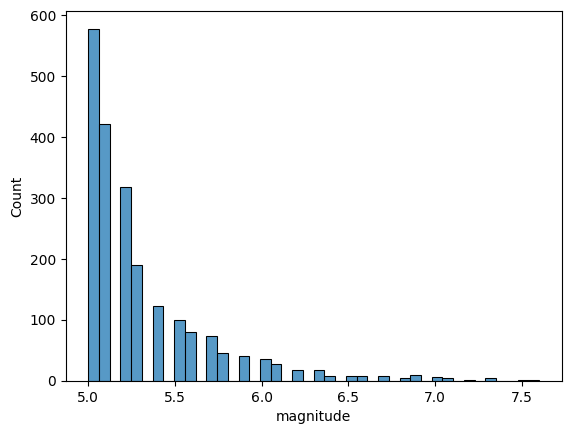

In [80]:
sns.histplot(earthquake['magnitude'])

<Axes: xlabel='sig', ylabel='Count'>

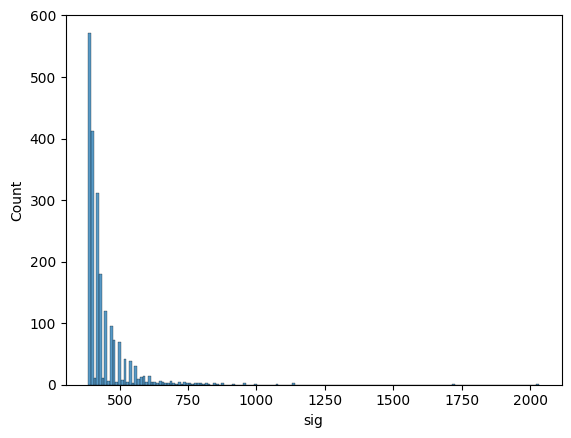

In [81]:
sns.histplot(earthquake['sig'])

- An earthquake with a higher significance value indicates a greater potential impact and importance. According to the USGS, any event with a significance value greater than 600 is considered significant and is highlighted in their reports.

In [82]:
tsunami_counts = earthquake.reset_index()
tsunami_counts = tsunami_counts.groupby('tsunami')['id'].count()

In [83]:
tsunami_counts

tsunami
0    2104
1      25
Name: id, dtype: int64

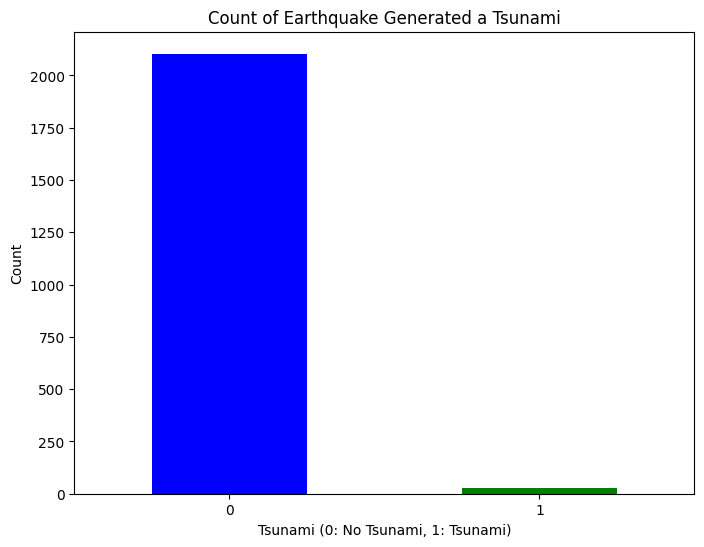

In [84]:
plt.figure(figsize=(8, 6))
tsunami_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tsunami (0: No Tsunami, 1: Tsunami)')
plt.ylabel('Count')
plt.title('Count of Earthquake Generated a Tsunami')
plt.xticks(rotation=0)
plt.show()

Indicates whether the earthquake generated a tsunami (1 for yes, 0 for no).

In [85]:
sea_places = earthquake[earthquake['place'].str.contains('sea', case=False, na=False)]

In [86]:
sea_places

,time,place,magnitude,tsunami,sig,longitude,latitude,depth,coordinates,location,country
id,,,,,,,,,,,
usc000mjh5,2014-02-06 20:29:08.040,Banda Sea,5.1,0,400,129.0770,-6.6239,205.180,"[129.077, -6.6239, 205.18]",Banda Sea,Indonesia
usc000n6pi,2014-03-10 17:31:31.880,Banda Sea,5.0,0,385,129.8413,-6.9663,120.630,"[129.8413, -6.9663, 120.63]",Banda Sea,Indonesia
usb000sltd,2014-10-13 22:05:39.580,Banda Sea,5.3,0,433,129.7040,-6.6661,155.120,"[129.704, -6.6661, 155.12]",Banda Sea,Indonesia
usb000t0ax,2014-11-26 17:16:02.900,Molucca Sea,5.0,0,385,126.4889,1.7711,35.000,"[126.4889, 1.7711, 35]",Molucca Sea,Indonesia
usc000sweg,2014-11-11 21:22:25.570,Banda Sea,5.1,0,400,129.4940,-6.7773,159.950,"[129.494, -6.7773, 159.95]",Banda Sea,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...
us7000l9i4,2023-11-08 05:42:39.813,Banda Sea,5.2,0,416,129.8961,-6.1801,10.000,"[129.8961, -6.1801, 10]",Banda Sea,Indonesia
us7000l9h4,2023-11-08 04:53:49.631,Banda Sea,7.1,0,779,129.5466,-6.4160,6.000,"[129.5466, -6.416, 6]",Banda Sea,Indonesia
us7000l9h2,2023-11-08 04:52:51.393,Banda Sea,6.7,1,692,129.7518,-6.4442,10.000,"[129.7518, -6.4442, 10]",Banda Sea,Indonesia


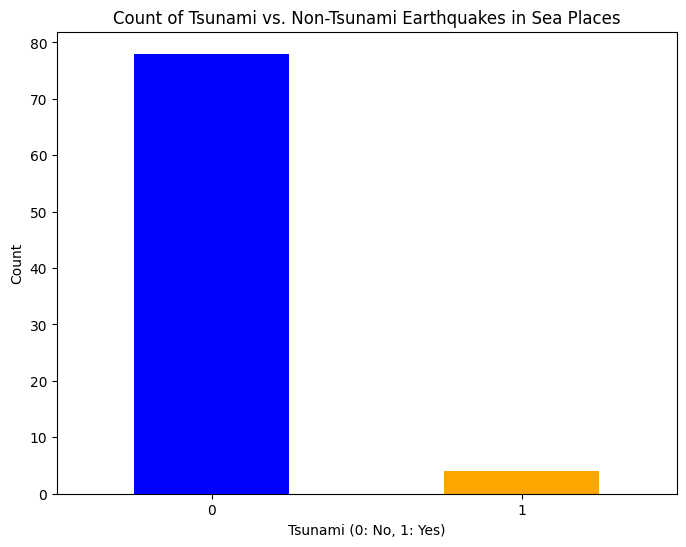

In [87]:
# Counting tsunami vs. non-tsunami events
tsunami_sea_counts = sea_places['tsunami'].value_counts()

# Plotting tsunami vs. non-tsunami events
plt.figure(figsize=(8, 6))
tsunami_sea_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Tsunami (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Count of Tsunami vs. Non-Tsunami Earthquakes in Sea Places')
plt.xticks(rotation=0)
plt.show()

In [88]:
tsunami_sea_counts

tsunami
0    78
1     4
Name: count, dtype: int64

In [103]:
tsunami_counts

tsunami
0    2104
1      25
Name: id, dtype: int64

In [121]:
print('Tsunami pct: ', round(tsunami_counts[1]/len(earthquake),3))

Tsunami pct:  0.012


In [120]:
print('Tsunami in seas pct: ', round(tsunami_sea_counts[1]/len(earthquake),3))

Tsunami in seas pct:  0.002


In [123]:
print('Tsunami in seas pct: ', round(tsunami_sea_counts[1]/len(sea_places),3))

Tsunami in seas pct:  0.049


In [89]:
sea_avg_magnitude = sea_places['magnitude'].mean()
avg_magnitude = earthquake['magnitude'].mean()

print("Average magnitude in Sea places: ", round(sea_avg_magnitude, 2))
print("Average magnitude in all places: ", round(avg_magnitude, 2))

Average magnitude in Sea places:  5.4
Average magnitude in all places:  5.31


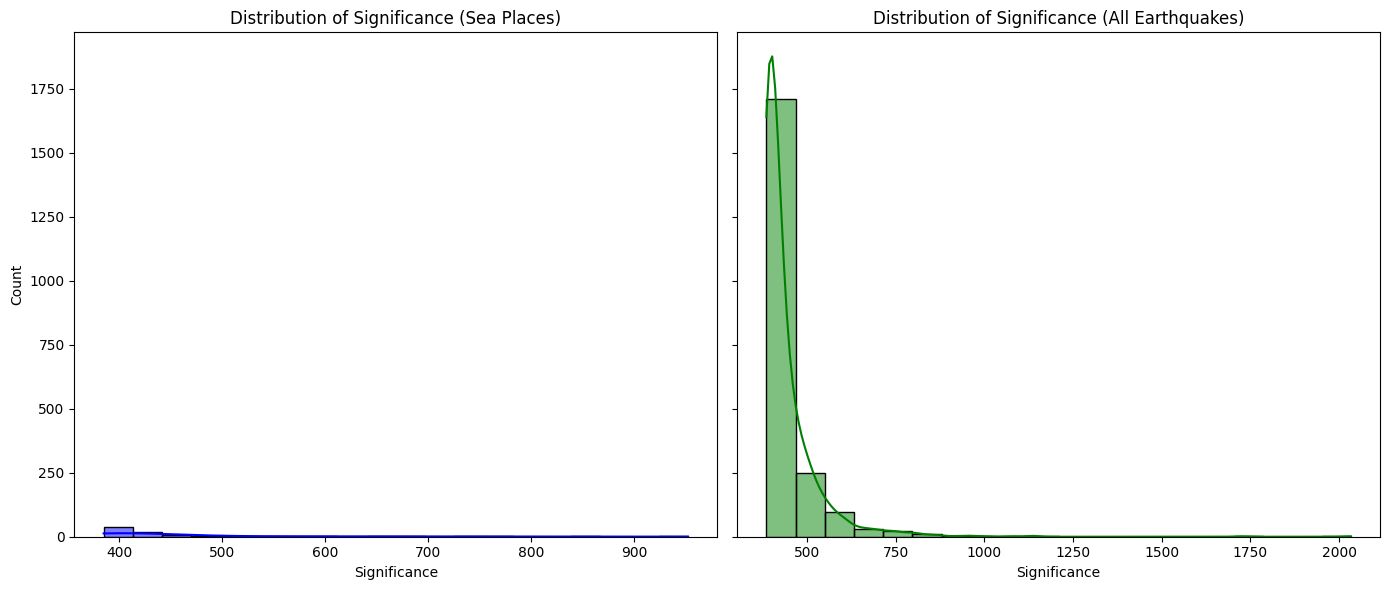

In [90]:
# Setting up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the distribution of significance for sea places
sns.histplot(sea_places['sig'], bins=20, kde=True, ax=axes[0], color='blue', edgecolor='black')
axes[0].set_title('Distribution of Significance (Sea Places)')
axes[0].set_xlabel('Significance')
axes[0].set_ylabel('Count')

# Plotting the distribution of significance for all earthquakes
sns.histplot(earthquake['sig'], bins=20, kde=True, ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Distribution of Significance (All Earthquakes)')
axes[1].set_xlabel('Significance')

# Adjusting layout
plt.tight_layout()
plt.show()

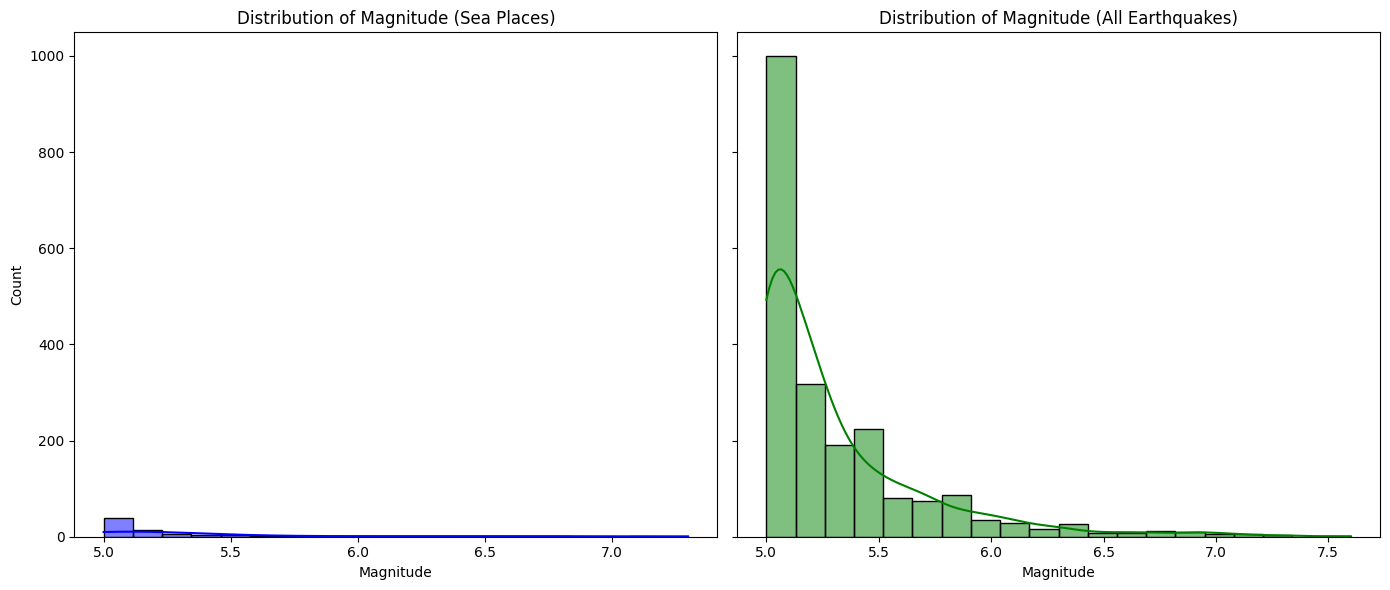

In [91]:
# Setting up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the distribution of significance for sea places
sns.histplot(sea_places['magnitude'], bins=20, kde=True, ax=axes[0], color='blue', edgecolor='black')
axes[0].set_title('Distribution of Magnitude (Sea Places)')
axes[0].set_xlabel('Magnitude')

# Plotting the distribution of significance for all earthquakes
sns.histplot(earthquake['magnitude'], bins=20, kde=True, ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Distribution of Magnitude (All Earthquakes)')
axes[1].set_xlabel('Magnitude')

# Adjusting layout
plt.tight_layout()
plt.show()

In [93]:
print("Earthquake count significance higher than 600: ", earthquake[earthquake['sig'] > 600].shape[0], "out of", len(earthquake))

Earthquake count significance higher than 600:  95 out of 2129


In [94]:
print("Earthquake count magnitude higher than 5: ", earthquake[earthquake['magnitude'] > 5].shape[0], "out of", len(earthquake))
print("Earthquake count magnitude higher than 6: ", earthquake[earthquake['magnitude'] > 6].shape[0], "out of", len(earthquake))
print("Earthquake count magnitude higher than 7: ", earthquake[earthquake['magnitude'] > 7].shape[0], "out of", len(earthquake))
print("Earthquake count magnitude higher than 8: ", earthquake[earthquake['magnitude'] > 8].shape[0], "out of", len(earthquake))
print("Earthquake count magnitude higher than 9: ", earthquake[earthquake['magnitude'] > 9].shape[0], "out of", len(earthquake))

Earthquake count magnitude higher than 5:  1551 out of 2129
Earthquake count magnitude higher than 6:  124 out of 2129
Earthquake count magnitude higher than 7:  12 out of 2129
Earthquake count magnitude higher than 8:  0 out of 2129
Earthquake count magnitude higher than 9:  0 out of 2129


# 2024 earthquake locations

In [95]:
earthquake['time'] = pd.to_datetime(earthquake['time'])
earthquake_24 = earthquake[earthquake['time'].dt.year == 2024]

In [126]:
import folium

# Initialize the map centered around Indonesia
m = folium.Map(location=[-2.5489, 118.0149], zoom_start=5)

# Function to choose marker color based on magnitude
def get_marker_color(magnitude):
    if 5.0 <= magnitude < 6.0:
        return 'green'
    elif 6.0 <= magnitude < 7.0:
        return 'orange'
    else:
        return 'red'

# Add markers to the map
for idx, row in earthquake_24.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"Place: {row['place']}<br>Magnitude: {row['magnitude']}<br>Tsunami: {row['tsunami']}<br>Significance: {row['sig']}", max_width=300),
        icon=folium.Icon(color=get_marker_color(row['magnitude']))
    ).add_to(m)

# Display the map
m.save('earthquake_map.html')

In [97]:
m

# earthquake magnitude > 7 in the last 5 years

In [98]:
earthquake_above_7 = earthquake[earthquake['magnitude'] > 7]

In [124]:
import folium

# Initialize the map centered around Indonesia
m7 = folium.Map(location=[-2.5489, 118.0149], zoom_start=5)

# Function to choose marker color based on magnitude
def get_marker_color(magnitude):
    if 5.0 <= magnitude < 6.0:
        return 'green'
    elif 6.0 <= magnitude < 7.0:
        return 'orange'
    else:
        return 'red'

# Add markers to the map
for idx, row in earthquake_above_7.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"Place: {row['place']}<br>Magnitude: {row['magnitude']}<br>Tsunami: {row['tsunami']}<br>Significance: {row['sig']}", max_width=300),
        icon=folium.Icon(color=get_marker_color(row['magnitude']))
    ).add_to(m7)

# Display the map
m7.save('earthquake_m7_map.html')

In [100]:
m7

# earthquake in seas

In [125]:
import folium

# Initialize the map centered around Indonesia
sm = folium.Map(location=[-2.5489, 118.0149], zoom_start=5)

# Function to choose marker color based on magnitude
def get_marker_color(magnitude):
    if 5.0 <= magnitude < 6.0:
        return 'green'
    elif 6.0 <= magnitude < 7.0:
        return 'orange'
    else:
        return 'red'

# Add markers to the map
for idx, row in sea_places.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"Place: {row['place']}<br>Magnitude: {row['magnitude']}<br>Tsunami: {row['tsunami']}<br>Significance: {row['sig']}", max_width=300),
        icon=folium.Icon(color=get_marker_color(row['magnitude']))
    ).add_to(sm)

#Display the map
sm.save('earthquake_sea_map.html')

In [102]:
sm

In [528]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

m.add_child(mouse_position)
m7.add_child(mouse_position)
tm.add_child(mouse_position)

# usgs tsunami

In [127]:
tsunami = earthquake[earthquake['tsunami'] == 1]

In [130]:
tsunami['location'].value_counts()

location
Ternate        5
Tobelo         4
Abepura        2
Sarangani      2
Pondaguitan    2
Banda Sea      2
Tondano        1
Tabiauan       1
Burias         1
Molucca Sea    1
Luwuk          1
Flores Sea     1
Gili Air       1
Kablalan       1
Name: count, dtype: int64

<Axes: xlabel='magnitude', ylabel='Count'>

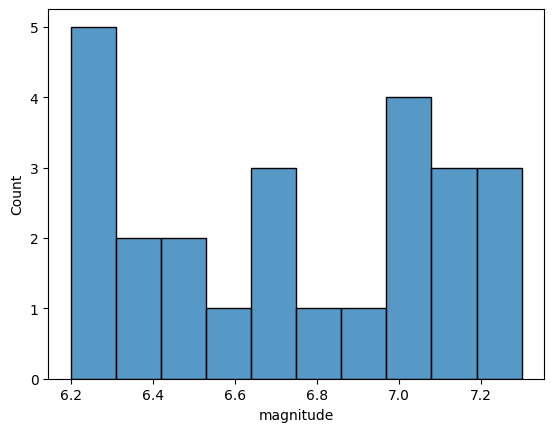

In [165]:
sns.histplot(tsunami['magnitude'], bins=10)

<Axes: xlabel='depth', ylabel='Count'>

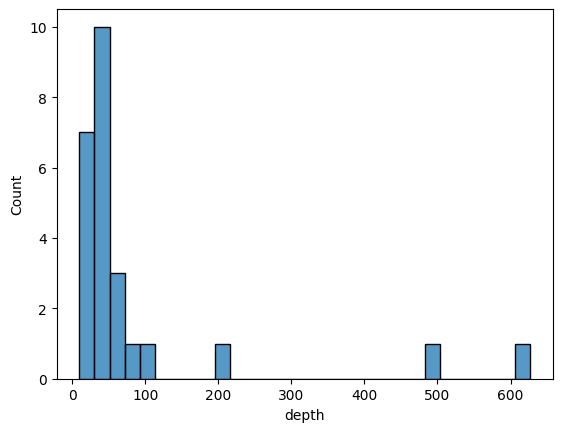

In [137]:
sns.histplot(tsunami['depth'])

<Axes: xlabel='sig', ylabel='Count'>

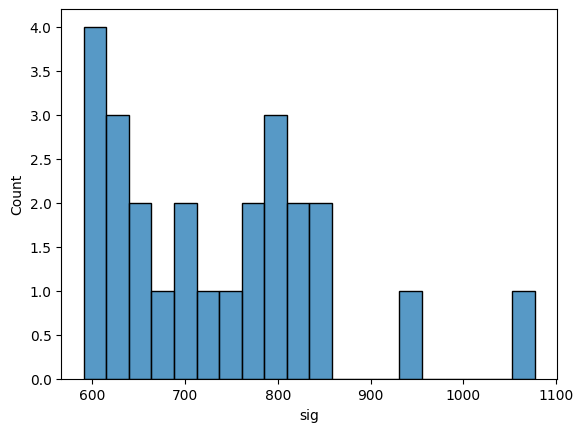

In [163]:
sns.histplot(tsunami['sig'], bins=20)

In [145]:
tsunami['time'].dt.year.value_counts(ascending=False)

time
2023    5
2014    4
2019    3
2021    3
2015    2
2016    2
2017    2
2024    2
2018    1
2020    1
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1317f9fd0>,
 [Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

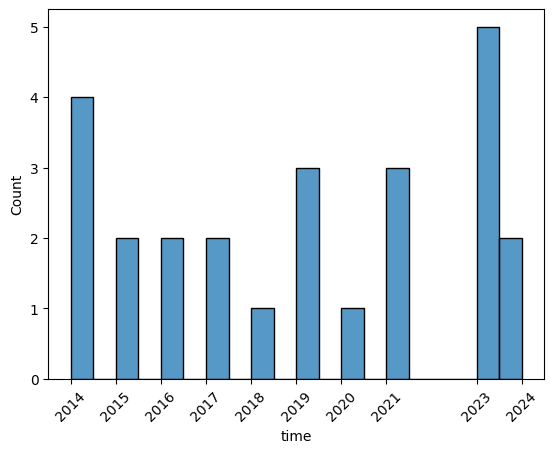

In [162]:
years = tsunami['time'].dt.year.unique()
sns.histplot(tsunami['time'].dt.year, bins=20)
plt.xticks(years, rotation=45)

# noaa tsunami

In [340]:
noaa_tsunami = pd.read_csv('noaa_tsunami.tsv', sep='\t')
noaa_tsunami.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""1900 <= Year >= 2024"",""Country = INDONESIA""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1900.0,1.0,10.0,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1900.0,10.0,7.0,21.0,4.0,NaN,3.0,1.0,6.9,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
3,NaN,1903.0,3.0,30.0,NaN,NaN,NaN,2.0,1.0,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1904.0,2.0,2.0,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [341]:
noaa_tsunami.drop(index=noaa_tsunami.index[0], inplace=True)

In [342]:
noaa_tsunami.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,NaN,1900.0,1.0,10.0,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1900.0,10.0,7.0,21.0,4.0,NaN,3.0,1.0,6.9,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
3,NaN,1903.0,3.0,30.0,NaN,NaN,NaN,2.0,1.0,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1904.0,2.0,2.0,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1904.0,7.0,5.0,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [343]:
noaa_tsunami.isna().sum()

Search Parameters                     134
Year                                    0
Mo                                      0
Dy                                      2
Hr                                     36
Mn                                     36
Sec                                    42
Tsunami Event Validity                  0
Tsunami Cause Code                      0
Earthquake Magnitude                   33
Vol                                   121
More Info                             134
Deposits                                0
Country                                 0
Location Name                           0
Latitude                                1
Longitude                               1
Maximum Water Height (m)               54
Number of Runups                        0
Tsunami Magnitude (Abe)               133
Tsunami Magnitude (Iida)               91
Tsunami Intensity                      73
Deaths                                105
Death Description                 

In [344]:
cols = ['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec',
       'Tsunami Event Validity', 'Tsunami Cause Code', 'Earthquake Magnitude',
       'Vol', 'More Info', 'Deposits', 'Country', 'Location Name', 'Latitude',
       'Longitude', 'Maximum Water Height (m)', 'Number of Runups',
       'Tsunami Magnitude (Abe)', 'Tsunami Magnitude (Iida)',
       'Tsunami Intensity', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description']

In [345]:
for col in cols:
    missing_values_pct = round((noaa_tsunami[col].isna().sum()/len(noaa_tsunami)) * 100, 2)
    print(f"Column: {col}, Missing Values Percentage: {missing_values_pct:}")

Column: Search Parameters, Missing Values Percentage: 100.0
Column: Year, Missing Values Percentage: 0.0
Column: Mo, Missing Values Percentage: 0.0
Column: Dy, Missing Values Percentage: 1.49
Column: Hr, Missing Values Percentage: 26.87
Column: Mn, Missing Values Percentage: 26.87
Column: Sec, Missing Values Percentage: 31.34
Column: Tsunami Event Validity, Missing Values Percentage: 0.0
Column: Tsunami Cause Code, Missing Values Percentage: 0.0
Column: Earthquake Magnitude, Missing Values Percentage: 24.63
Column: Vol, Missing Values Percentage: 90.3
Column: More Info, Missing Values Percentage: 100.0
Column: Deposits, Missing Values Percentage: 0.0
Column: Country, Missing Values Percentage: 0.0
Column: Location Name, Missing Values Percentage: 0.0
Column: Latitude, Missing Values Percentage: 0.75
Column: Longitude, Missing Values Percentage: 0.75
Column: Maximum Water Height (m), Missing Values Percentage: 40.3
Column: Number of Runups, Missing Values Percentage: 0.0
Column: Tsunami

In [346]:
cols_to_drop = ['Search Parameters', 'More Info', 'Vol', 'Tsunami Magnitude (Abe)', 'Tsunami Magnitude (Iida)',
       'Tsunami Intensity', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description']

In [347]:
noaa_tsunami.drop(cols_to_drop, axis=1, inplace=True)

In [348]:
noaa_tsunami.isna().sum()

Year                         0
Mo                           0
Dy                           2
Hr                          36
Mn                          36
Sec                         42
Tsunami Event Validity       0
Tsunami Cause Code           0
Earthquake Magnitude        33
Deposits                     0
Country                      0
Location Name                0
Latitude                     1
Longitude                    1
Maximum Water Height (m)    54
Number of Runups             0
dtype: int64

In [349]:
noaa_tsunami.dtypes

Year                        float64
Mo                          float64
Dy                          float64
Hr                          float64
Mn                          float64
Sec                         float64
Tsunami Event Validity      float64
Tsunami Cause Code          float64
Earthquake Magnitude        float64
Deposits                    float64
Country                      object
Location Name                object
Latitude                    float64
Longitude                   float64
Maximum Water Height (m)    float64
Number of Runups            float64
dtype: object

In [355]:
noaa_tsunami = noaa_tsunami[~noaa_tsunami['Dy'].isna() == True]
noaa_tsunami

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups
1,1900.0,1.0,10.0,NaN,NaN,NaN,1.0,1.0,NaN,0.0,INDONESIA,"GALELA, HALMAHERA ISLAND",1.820,127.850,NaN,1.0
2,1900.0,10.0,7.0,21.0,4.0,NaN,3.0,1.0,6.9,0.0,INDONESIA,BISMARCK SEA,-4.000,140.000,NaN,4.0
3,1903.0,3.0,30.0,NaN,NaN,NaN,2.0,1.0,6.5,0.0,INDONESIA,BANDA SEA,-3.000,127.500,1.00,2.0
4,1904.0,2.0,2.0,NaN,NaN,NaN,2.0,0.0,NaN,0.0,INDONESIA,CELEBES SEA,1.500,120.800,NaN,1.0
5,1904.0,7.0,5.0,NaN,NaN,NaN,1.0,1.0,NaN,0.0,INDONESIA,BANDA SEA,-3.600,128.700,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2020.0,5.0,29.0,5.0,30.0,NaN,0.0,4.0,NaN,0.0,INDONESIA,LESSER SUNDA: BALI: IJEN VOLCANO,-8.058,114.242,3.00,1.0
131,2021.0,6.0,16.0,4.0,43.0,7.0,4.0,3.0,5.8,0.0,INDONESIA,BANDA SEA,-3.593,129.503,0.51,3.0
132,2021.0,12.0,14.0,3.0,20.0,24.0,4.0,1.0,7.3,0.0,INDONESIA,FLORES SEA,-7.603,122.200,0.07,2.0
133,2023.0,1.0,9.0,17.0,47.0,35.0,4.0,1.0,7.6,0.0,INDONESIA,SOUTH MALUKU,-7.049,130.038,0.09,2.0


In [356]:
noaa_tsunami[['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec']] = noaa_tsunami[['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec']].apply(pd.to_numeric, errors='coerce')
noaa_tsunami[['Year', 'Mo', 'Dy']] = noaa_tsunami[['Year', 'Mo', 'Dy']].astype(int)

In [436]:
noaa_tsunami[['Hr', 'Mn', 'Sec']] = noaa_tsunami[['Hr', 'Mn', 'Sec']].fillna(0).astype(int)

In [437]:
noaa_tsunami

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Date
1,1900,1,10,0,0,0,1.0,1.0,NaN,0.0,INDONESIA,"GALELA, HALMAHERA ISLAND",1.820,127.850,NaN,1.0,1900-01-10
2,1900,10,7,21,4,0,3.0,1.0,6.9,0.0,INDONESIA,BISMARCK SEA,-4.000,140.000,NaN,4.0,1900-10-07
3,1903,3,30,0,0,0,2.0,1.0,6.5,0.0,INDONESIA,BANDA SEA,-3.000,127.500,1.00,2.0,1903-03-30
4,1904,2,2,0,0,0,2.0,0.0,NaN,0.0,INDONESIA,CELEBES SEA,1.500,120.800,NaN,1.0,1904-02-02
5,1904,7,5,0,0,0,1.0,1.0,NaN,0.0,INDONESIA,BANDA SEA,-3.600,128.700,NaN,1.0,1904-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2020,5,29,5,30,0,0.0,4.0,NaN,0.0,INDONESIA,LESSER SUNDA: BALI: IJEN VOLCANO,-8.058,114.242,3.00,1.0,2020-05-29
131,2021,6,16,4,43,7,4.0,3.0,5.8,0.0,INDONESIA,BANDA SEA,-3.593,129.503,0.51,3.0,2021-06-16
132,2021,12,14,3,20,24,4.0,1.0,7.3,0.0,INDONESIA,FLORES SEA,-7.603,122.200,0.07,2.0,2021-12-14
133,2023,1,9,17,47,35,4.0,1.0,7.6,0.0,INDONESIA,SOUTH MALUKU,-7.049,130.038,0.09,2.0,2023-01-09


In [441]:
from datetime import datetime
noaa_tsunami['Date'] = noaa_tsunami['Year'].astype(str) + '-' + noaa_tsunami['Mo'].astype(str).str.zfill(2) + '-' + noaa_tsunami['Dy'].astype(str).str.zfill(2) + ' ' + noaa_tsunami['Hr'].astype(str).str.zfill(2) + ':' + noaa_tsunami['Mn'].astype(str).str.zfill(2) + ':' + noaa_tsunami['Sec'].astype(str).str.zfill(2)
noaa_tsunami['Date'] = pd.to_datetime(noaa_tsunami['Date'])

In [444]:
noaa_tsunami_confirmed = noaa_tsunami[noaa_tsunami['Tsunami Event Validity'] == 4] # 4: Definite Tsunami

<Axes: xlabel='Date', ylabel='Count'>

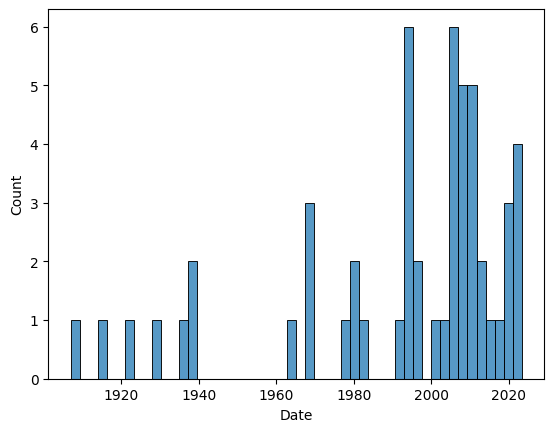

In [445]:
sns.histplot(noaa_tsunami_confirmed['Date'], bins=50)

<Axes: xlabel='Earthquake Magnitude', ylabel='Count'>

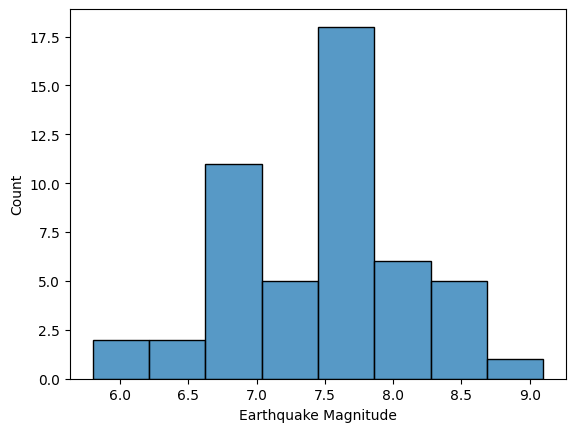

In [446]:
sns.histplot(noaa_tsunami_confirmed['Earthquake Magnitude'])

<Axes: xlabel='Tsunami Cause Code', ylabel='Count'>

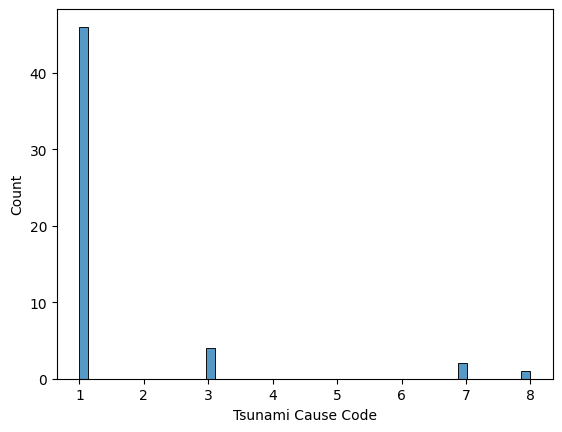

In [447]:
sns.histplot(noaa_tsunami_confirmed['Tsunami Cause Code'], bins=50)

The source of the tsunami:

0	Unknown

1	Earthquake

2	Questionable Earthquake

3	Earthquake and Landslide

4	Volcano and Earthquake

5	Volcano, Earthquake, and Landslide

6	Volcano

7	Volcano and Landslide

8	Landslide

9	Meteorological

10	Explosion

11	Astronomical Tide

<Axes: xlabel='Number of Runups', ylabel='Count'>

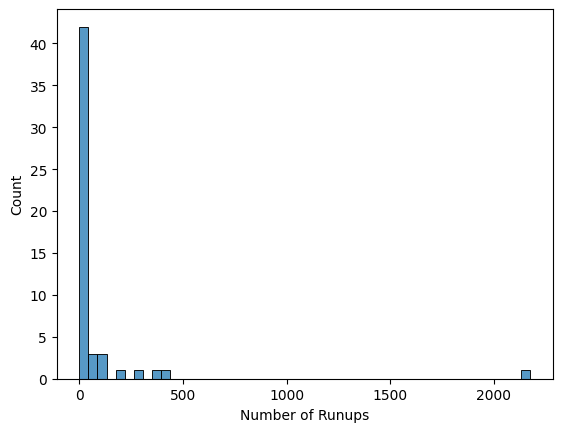

In [448]:
sns.histplot(noaa_tsunami_confirmed['Number of Runups'], bins=50)

In [449]:
noaa_tsunami_confirmed.columns

Index(['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsunami Event Validity',
       'Tsunami Cause Code', 'Earthquake Magnitude', 'Deposits', 'Country',
       'Location Name', 'Latitude', 'Longitude', 'Maximum Water Height (m)',
       'Number of Runups', 'Date'],
      dtype='object')

# 1900 - 2024 Tsunami in Indonesia

In [450]:
import folium

# Initialize the map centered around Indonesia
tm = folium.Map(location=[-2.5489, 118.0149], zoom_start=5)

def get_marker_color(max_water_height):
    if 0 <= max_water_height < 2:
        return 'green'
    elif 2.0 <= max_water_height < 5.0:
        return 'orange'
    else:
        return 'red'

# Add markers to the map
for idx, row in noaa_tsunami_confirmed.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(f"Date: {row['Date']}<br>Location Name: {row['Location Name']}<br>Earthquake Magnitude: {row['Earthquake Magnitude']}<br>Cause: {row['Tsunami Cause Code']}<br>Max Water Height: {row['Maximum Water Height (m)']}<br>Number of Runups: {row['Number of Runups']}", max_width=300),
        icon=folium.Icon(color=get_marker_color(row['Maximum Water Height (m)']))
    ).add_to(tm)

#Display the map
tm.save('noaa_tsunami_map.html')

In [553]:
tm

<Axes: ylabel='Maximum Water Height (m)'>

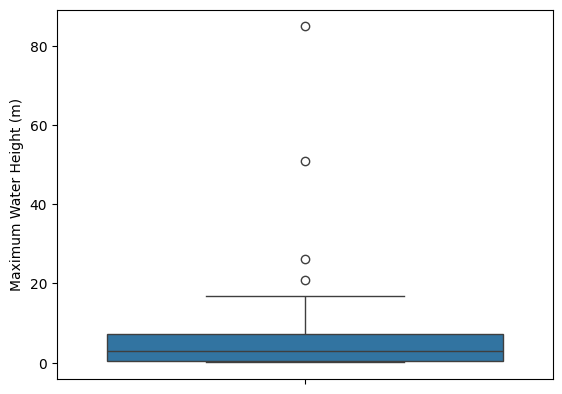

In [585]:
sns.boxplot(noaa_tsunami_confirmed['Maximum Water Height (m)'])

In [596]:
noaa_tsunami_confirmed.dropna(inplace=True)

/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_3288/4015330268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa_tsunami_confirmed.dropna(inplace=True)


In [600]:
import numpy as np
q3 = np.quantile(noaa_tsunami_confirmed['Maximum Water Height (m)'], 0.75)
q1 = np.quantile(noaa_tsunami_confirmed['Maximum Water Height (m)'], 0.25)
iqr = q3 - q1
upper = q3 + iqr * 1.5
lower = q1 - iqr * 1.5

qt3 = np.quantile(noaa_tsunami_confirmed['Number of Runups'], 0.75)
qt1 = np.quantile(noaa_tsunami_confirmed['Number of Runups'], 0.25)
iqrt = qt3 - qt1
uppert = qt3 + iqrt * 1.5
lowert = qt1 - iqrt * 1.5

print("Upper water height: ", upper)
print("Upper number of runups: ", uppert)

Upper water height:  11.004999999999999
Upper number of runups:  54.5


In [603]:
noaa_tsunami_confirmed_sig = noaa_tsunami_confirmed[(noaa_tsunami_confirmed['Maximum Water Height (m)'] > upper) | (noaa_tsunami_confirmed['Number of Runups'] > uppert)]

# Significant Tsunami in Indonesia 1900 - 2024

In [608]:
import folium

# Initialize the map centered around Indonesia
st = folium.Map(location=[-2.5489, 118.0149], zoom_start=5)

# Add markers to the map
for idx, row in noaa_tsunami_confirmed_sig.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(f"Date: {row['Date']}<br>Location Name: {row['Location Name']}<br>Earthquake Magnitude: {row['Earthquake Magnitude']}<br>Cause: {row['Tsunami Cause Code']}<br>Max Water Height: {row['Maximum Water Height (m)']}<br>Number of Runups: {row['Number of Runups']}", max_width=300),
        icon=folium.Icon(color='red')).add_to(st)

#Display the map
st.add_child(mouse_position)
st.save('noaa_sig_tsunami_map.html')

In [609]:
st

In [452]:
noaa_tsunami_confirmed.dtypes

Year                                 int64
Mo                                   int64
Dy                                   int64
Hr                                   int64
Mn                                   int64
Sec                                  int64
Tsunami Event Validity             float64
Tsunami Cause Code                 float64
Earthquake Magnitude               float64
Deposits                           float64
Country                             object
Location Name                       object
Latitude                           float64
Longitude                          float64
Maximum Water Height (m)           float64
Number of Runups                   float64
Date                        datetime64[ns]
dtype: object

<Axes: >

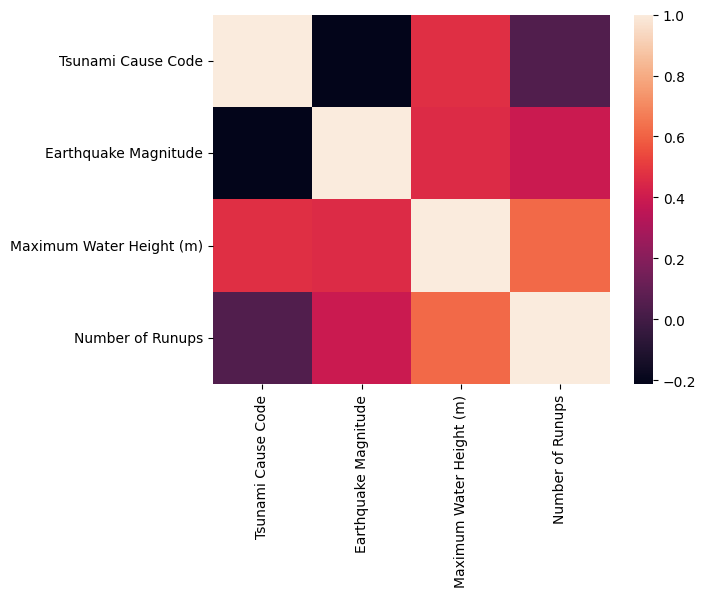

In [453]:
sns.heatmap(noaa_tsunami_confirmed[['Tsunami Cause Code', 'Earthquake Magnitude', 'Maximum Water Height (m)', 'Number of Runups']].corr())

- Tsunami Cause Code and Maximum Water Height: There is a moderate positive correlation, suggesting that different causes of tsunamis might influence the maximum water height differently.
- Earthquake Magnitude and Maximum Water Height: There is a strong positive correlation, indicating that larger earthquake magnitudes tend to result in higher maximum water heights.
- Earthquake Magnitude and Number of Runups: There is a moderate positive correlation, suggesting that larger earthquakes tend to cause more runups.
- Maximum Water Height and Number of Runups: There is a strong positive correlation, indicating that higher maximum water heights are associated with a greater number of runups.

# Machine Learning

In [610]:
noaa_tsunami_confirmed.dtypes

Year                                 int64
Mo                                   int64
Dy                                   int64
Hr                                   int64
Mn                                   int64
Sec                                  int64
Tsunami Event Validity             float64
Tsunami Cause Code                 float64
Earthquake Magnitude               float64
Deposits                           float64
Country                             object
Location Name                       object
Latitude                           float64
Longitude                          float64
Maximum Water Height (m)           float64
Number of Runups                   float64
Date                        datetime64[ns]
Date_only                           object
dtype: object

In [667]:
noaa_tsunami_confirmed['Tsunami Cause Code'] = noaa_tsunami_confirmed['Tsunami Cause Code'].astype('category')

/var/folders/sd/ltfh55_x0nsbl_mpxjmntw1m0000gn/T/ipykernel_3288/1818757734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa_tsunami_confirmed['Tsunami Cause Code'] = noaa_tsunami_confirmed['Tsunami Cause Code'].astype('category')


In [678]:
X = pd.get_dummies(noaa_tsunami_confirmed[['Tsunami Cause Code']], prefix='Cause')

In [679]:
X[['Earthquake Magnitude', 'Number of Runups']] = noaa_tsunami_confirmed[['Earthquake Magnitude', 'Number of Runups']]

In [680]:
X[['Cause_1.0', 'Cause_3.0']]= X[['Cause_1.0', 'Cause_3.0']].astype(int)

In [681]:
X.head()

,Cause_1.0,Cause_3.0,Earthquake Magnitude,Number of Runups
7,1,0,8.2,88.0
15,1,0,8.1,5.0
31,1,0,7.5,3.0
49,1,0,7.7,2.0
52,1,0,8.6,5.0


In [687]:
y = pd.DataFrame(noaa_tsunami_confirmed['Maximum Water Height (m)'])

In [683]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [684]:
# Separate numeric and categorical features
X_numeric = X[['Earthquake Magnitude', 'Number of Runups']]
X_categorical = X[['Cause_1.0', 'Cause_3.0']]

# Standardize numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Convert numeric array back to DataFrame
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=['Magnitude (Z-score)', 'Runups (Z-score)'])

# Combine numeric and categorical features
X = pd.concat([X_categorical.reset_index(drop=True), X_numeric_scaled_df.reset_index(drop=True)], axis=1)

In [685]:
X.head()

,Cause_1.0,Cause_3.0,Magnitude (Z-score),Runups (Z-score)
0,1,0,1.063944,0.025320
1,1,0,0.915560,-0.235985
2,1,0,0.025257,-0.242281
3,1,0,0.322025,-0.245429
4,1,0,1.657480,-0.235985


In [688]:
y.head()

,Maximum Water Height (m)
7,15.0
15,0.1
31,0.1
49,3.0
52,1.0


In [692]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [693]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

In [694]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

/usr/local/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [695]:
# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}")
    print()

Linear Regression:
  MAE: 4.006257860832618
  MSE: 39.01225781603077
  R²: 0.3239760759637925

Ridge:
  MAE: 4.057101904931285
  MSE: 40.05161942797093
  R²: 0.305965497885749

Lasso:
  MAE: 4.070808462216268
  MSE: 43.401740813463576
  R²: 0.2479129182145532

Decision Tree:
  MAE: 5.8406666666666665
  MSE: 65.30840666666666
  R²: -0.13169674914868512

Random Forest:
  MAE: 4.557507158730157
  MSE: 36.922014098136664
  R²: 0.36019686500467074

Gradient Boosting:
  MAE: 4.571195803222602
  MSE: 40.23614924331802
  R²: 0.30276787291205787

SVR:
  MAE: 4.183449280657956
  MSE: 54.37847086515286
  R²: 0.05770264744217213



In [696]:
# Hyperparameter Tuning 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [697]:
# Best model from Grid Search
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Best Random Forest:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_best)}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_best)}")
print(f"  R²: {r2_score(y_test, y_pred_best)}")

Best Random Forest:
  MAE: 4.454533761904759
  MSE: 35.06108605447627
  R²: 0.3924439572995283


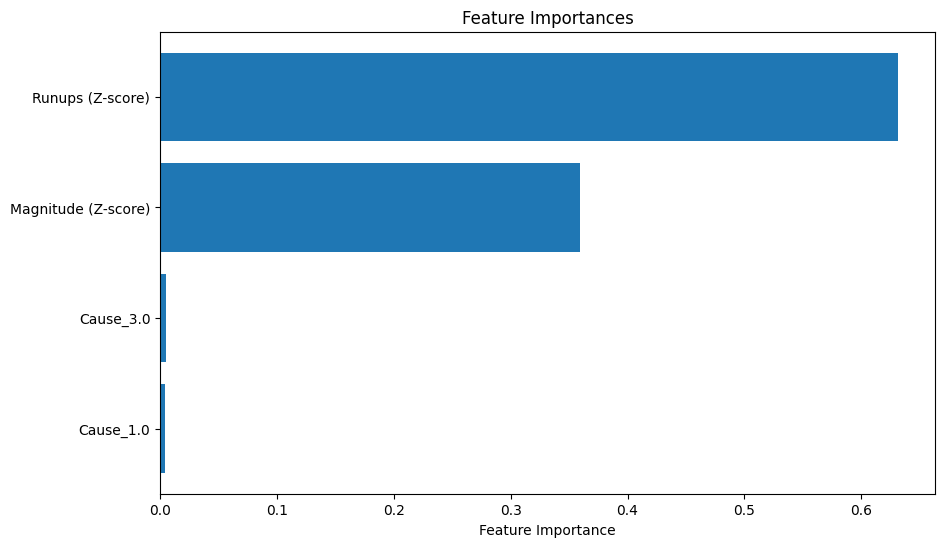

In [704]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_rf.feature_importances_
features = X.columns 

indices = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Feature Importance')
plt.show()

In [705]:
import joblib

In [706]:
# Save the model
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [707]:
# Load the model
loaded_model = joblib.load('random_forest_model.pkl')

In [708]:
loaded_model

RandomForestRegressor()